In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values.astype('float64')
Y = data['identity'].values.astype('int64')

In [3]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=None) 
train_Features[:2]

array([[-0.94949485, -0.65176299, -1.13443205,  2.2223982 ,  2.82643036,
         0.28019565, -0.07167907,  0.41179329,  0.92713306,  0.02375188],
       [ 1.31207595,  0.23025356,  0.09391522, -0.52310015, -0.55703835,
         1.24794295,  2.07005659, -0.70702467,  0.62806323,  1.4935493 ]])

In [4]:
test_Features[:2]

array([[-0.83028441, -0.55780573, -0.80115954,  1.12945026,  1.66723715,
         0.12691847, -0.40619493, -0.55526894, -0.25471108, -0.84517833],
       [-0.39320309, -0.52026534, -0.26221027, -0.20801606, -0.18692904,
         0.69641567,  0.39177322,  0.37169609, -0.79954638,  0.32375259]])

In [5]:
train_Label[:4]

array([1, 0, 1, 1])

In [6]:
train_Features.shape

(15216, 10)

In [7]:
test_Label[:4]

array([1, 1, 1, 1])

In [8]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

Using TensorFlow backend.


In [9]:
model = Sequential()

In [10]:
model.add(Dense(units=30*8,  input_dim=10, 
                kernel_initializer='uniform', 
                activation='relu'))

In [11]:
model.add(Dense(units=30*7, 
                kernel_initializer='uniform', 
                activation='relu'))

In [12]:
model.add(Dense(units=30*6, 
                kernel_initializer='uniform', 
                activation='relu'))

In [13]:
model.add(Dense(units=30*5, 
                kernel_initializer='uniform', 
                activation='relu'))

In [14]:
model.add(Dense(units=30*4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [15]:
model.add(Dense(units=30*3, 
                kernel_initializer='uniform', 
                activation='relu'))

In [16]:
model.add(Dense(units=30*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [17]:
model.add(Dense(units=30, 
                kernel_initializer='uniform', 
                activation='relu'))

In [18]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 240)               2640      
_________________________________________________________________
dense_2 (Dense)              (None, 210)               50610     
_________________________________________________________________
dense_3 (Dense)              (None, 180)               37980     
_________________________________________________________________
dense_4 (Dense)              (None, 150)               27150     
_________________________________________________________________
dense_5 (Dense)              (None, 120)               18120     
_________________________________________________________________
dense_6 (Dense)              (None, 90)                10890     
_________________________________________________________________
dense_7 (Dense)              (None, 60)                5460      
__________

In [20]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [21]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=400,verbose=2,callbacks=[early_stopping])

Train on 13694 samples, validate on 1522 samples
Epoch 1/30
 - 6s - loss: 0.6782 - acc: 0.6480 - val_loss: 0.5503 - val_acc: 0.6564
Epoch 2/30
 - 1s - loss: 0.4949 - acc: 0.6863 - val_loss: 0.4344 - val_acc: 0.8259
Epoch 3/30
 - 1s - loss: 0.3843 - acc: 0.8417 - val_loss: 0.3538 - val_acc: 0.8614
Epoch 4/30
 - 1s - loss: 0.3491 - acc: 0.8573 - val_loss: 0.3457 - val_acc: 0.8561
Epoch 5/30
 - 1s - loss: 0.3380 - acc: 0.8625 - val_loss: 0.3081 - val_acc: 0.8798
Epoch 6/30
 - 1s - loss: 0.3257 - acc: 0.8664 - val_loss: 0.3227 - val_acc: 0.8745
Epoch 7/30
 - 1s - loss: 0.3223 - acc: 0.8648 - val_loss: 0.3109 - val_acc: 0.8791
Epoch 8/30
 - 1s - loss: 0.3113 - acc: 0.8712 - val_loss: 0.2988 - val_acc: 0.8771
Epoch 9/30
 - 1s - loss: 0.3072 - acc: 0.8716 - val_loss: 0.3038 - val_acc: 0.8765
Epoch 10/30
 - 1s - loss: 0.3047 - acc: 0.8728 - val_loss: 0.3028 - val_acc: 0.8752
Epoch 11/30
 - 1s - loss: 0.3013 - acc: 0.8758 - val_loss: 0.3088 - val_acc: 0.8778


In [22]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

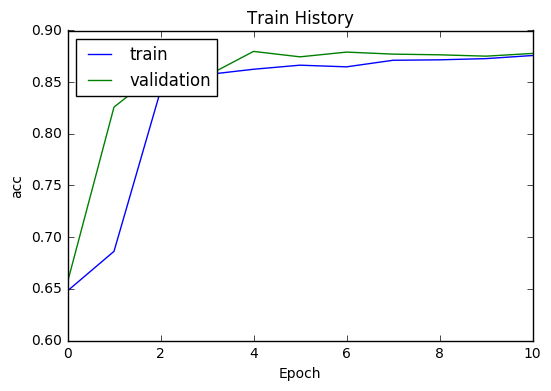

In [23]:
show_train_history(train_history,'acc','val_acc')

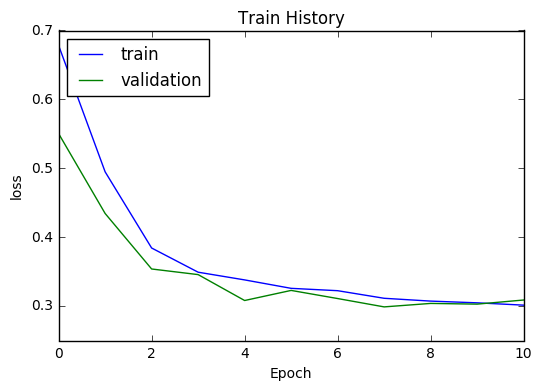

In [24]:
show_train_history(train_history,'loss','val_loss')

In [25]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

3804/3804 [==============================] - 0s 59us/step


In [26]:
scores[1]

0.8688222924492212